<a href="https://colab.research.google.com/github/smjimenez97/arboldedecision/blob/master/Arbol_de_Decisiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gráfica dispersión: Edad y Colesterol

In [10]:
#Importamos las librerias
import pandas as pd
import matplotlib.pyplot as plt



In [11]:
supervivientes = pd.read_csv("titanic.csv")

In [12]:
supervivientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
 12  Unnamed: 12  0 non-null      float64
 13  Unnamed: 13  0 non-null      float64
dtypes: float64(4), int64(5), object(5)
memory usage: 97.6+ KB


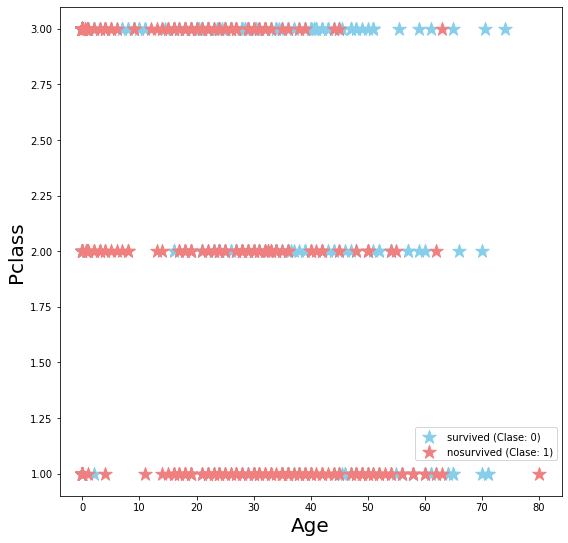

In [13]:
supervivientes = pd.read_csv("titanic.csv")

survived= supervivientes[supervivientes["Survived"]==0]
nosurvived= supervivientes[supervivientes["Survived"]==1]

plt.figure(figsize=(9, 9))
plt.xlabel('Age', fontsize = 20.0)
plt.ylabel('Pclass', fontsize = 20.0)
plt.scatter(survived["Age"], survived["Pclass"], 
            label="survived (Clase: 0)", marker="*", c="skyblue", s=200)
plt.scatter(nosurvived["Age"], nosurvived["Pclass"],
            label="nosurvived (Clase: 1)", marker="*", c="lightcoral", s=200)
plt.legend(bbox_to_anchor=(1, 0.15))
plt.show()

# Entropía:
Promedio de información almacenada en una variable aleatoria


In [14]:
from scipy.stats import entropy
from math import log



edades = pd.Series([40, 30, 20, 50])
pclass = pd.Series([1,2,3])


print(edades.value_counts()/edades.size)
print(pclass.value_counts()/pclass.size)
print(entropy(edades.value_counts()/edades.size, base=2))
print(entropy(pclass.value_counts()/pclass.size, base=2))

40    0.25
30    0.25
20    0.25
50    0.25
dtype: float64
1    0.333333
2    0.333333
3    0.333333
dtype: float64
2.0
1.584962500721156


# Datos de Entrenamiento y Prueba

In [15]:
from sklearn.model_selection import train_test_split

datos_entrena, datos_prueba, clase_entrena, clase_prueba = train_test_split(
    supervivientes[["Age", "Pclass"]],
   supervivientes["Survived"], 
    test_size=0.30)

# Creación del Árbol de Decisión

0.6604477611940298
|--- Pclass <= 2.50
|   |--- Age <= 60.50
|   |   |--- class: 1
|   |--- Age >  60.50
|   |   |--- class: 0
|--- Pclass >  2.50
|   |--- Age <= 33.50
|   |   |--- class: 0
|   |--- Age >  33.50
|   |   |--- class: 0



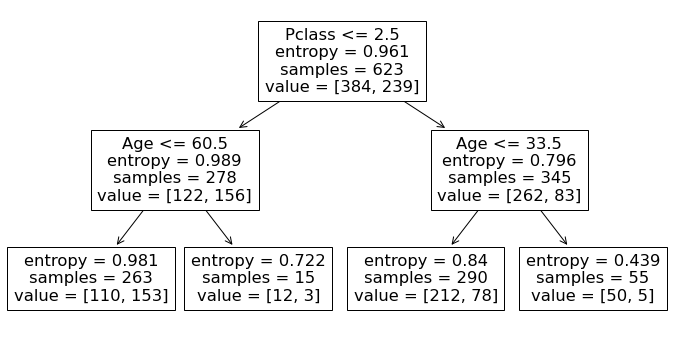

In [16]:
from sklearn import tree
arbol_decision = tree.DecisionTreeClassifier(criterion="entropy",max_depth=2)
arbol = arbol_decision.fit(datos_entrena, clase_entrena)

accuracy = arbol_decision.score(datos_prueba, clase_prueba)

print(accuracy)

print(tree.export_text(arbol,
                      feature_names=["Age", "Pclass"]))
plt.figure(figsize=(12, 6))
tree.plot_tree(arbol, 
              feature_names=["Age", "Pclass"])
plt.show()
